# Machine Learning para a Detecção do Câncer de Mama

A utilização de Machine Learning para a detecção do câncer de mama vem crescendo cada vez mais, e contribuído para diagnósticos mais rápidos e precisos.



Uma das principais características do câncer de mama é que quanto mais precoce for o seu diagnóstico, maiores são as chances de tratamento. Entretanto, uma pesquisa realizada revelou que mais de 3,8 milhões de mulheres na faixa de 50 a 69 anos nunca haviam feito autoexame ou mamografia.

A fim de aumentar a conscientização a respeito da prevenção e diagnóstico precoce, há todo ano a campanha Outubro Rosa, que visa alertar principalmente as mulheres sobre esta causa.

Contribuindo com essa conscientização e com a campanha Outubro Rosa, preparei um projeto de Data Science onde construi um modelo de Machine Learning capaz de detectar o câncer de mama.

## Importar os Dados

Para a construção do modelo de Machine Learning foi usado o banco de dados Wisconsin, disponibilizado no Repositório de Machine Learning da UCI.

Os dados que serão utilizados nesta análise também estão disponíveis para download por meio <a href="..">deste link direto</a>, e consistem basicamente em um arquivo csv contendo 569 entradas e 32 colunas onde as observações foram obtidas por meio da aspiração com agulha fina de células da mama. Ressalta-se ainda que a variável alvo pode ser classificada em benigna ou maligna.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings(action="ignore")

sns.set_style()

In [42]:
dados=pd.read_csv("breast-cancer-wisconsin.csv")

In [43]:
dados.drop("Unnamed: 32",axis=1,inplace=True)

## Análise Exploratória

A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

A coluna id representa o número de identificação.
A coluna diagnosis é a variável alvo.
M - Maligno
B - Benigno


In [44]:
#Vendo a Quantidade de Linha e de Coluna
print("DIMENCÇÃO DO DATAFRAME")
print("Linhas: ",dados.shape[0])
print("Colunas", dados.shape[1])

DIMENCÇÃO DO DATAFRAME
Linhas:  569
Colunas 32


Já as primeiras 5 entradas e as últimas 5 entradas desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [45]:
#Vendo as 5 primeiras entradas
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
#Vendo as últimas 5 entradas
dados.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**Agora vamos ver o resumo estátistico usando a função describe().**

**Análisandom podemos ver que está tudo em ordem, este Dataset foi muito bem trabalhado.**

In [47]:
dados.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Vendo o tipo de cada variavel**

In [48]:
print("\nTIPOS DE CADA VARIAVEL")
dados.dtypes


TIPOS DE CADA VARIAVEL


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Como em qualquer projeto de Data Science, a verificação da presença de valores ausentes no dataset é de extrema importância, pois é o reflexo direto da qualidade do mesmo.

Análisando podemos ver que não temos nenhum valor NAN, e isso é muito bom.

In [49]:
print("\nVALORES AUSENTES")
(dados.isnull().sum())/dados.shape[0]


VALORES AUSENTES


id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

Mesmo todos os valores sendo numéricos, particularmente eu gosto de verificar a quantidade de valores únicos para cada feature, pois isso permite verificar se os números podem estar representando classes, por exemplo.

In [50]:
print("\nVALORES ÚNICOS")
dados.nunique().sort_values()


VALORES ÚNICOS


diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
id                         569
dtype: i

Agora irei verificar o balanceamento do dataset vendo a porcentagem de valores da variável alvo. Como se pode ver abaixo, existem um pequeno desbalanceamento de valores.

DIAGNOSTICO
B    357
M    212
Name: diagnosis, dtype: int64


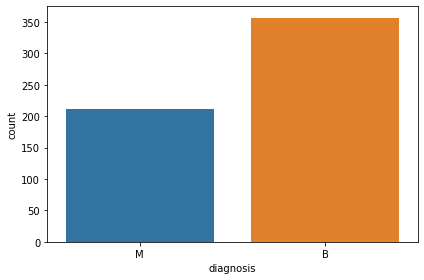

In [51]:
print("DIAGNOSTICO")
print(dados["diagnosis"].value_counts())

fig,ax=plt.subplots()

sns.countplot(dados.diagnosis,ax=ax)

plt.tight_layout()



Para ter a noção de como as variáveis estão distribuídas, vou plotar o histograma de todas as variáveis numéricas, excluindo a coluna id, uma vez que ela Não acrescenta nenhuma informação importante.

Preste sempre atenção em como os valores de algumas variáveis estão mais bem distribuídos em torno de uma média e outras tendem a puxar o histograma para a esquerda.

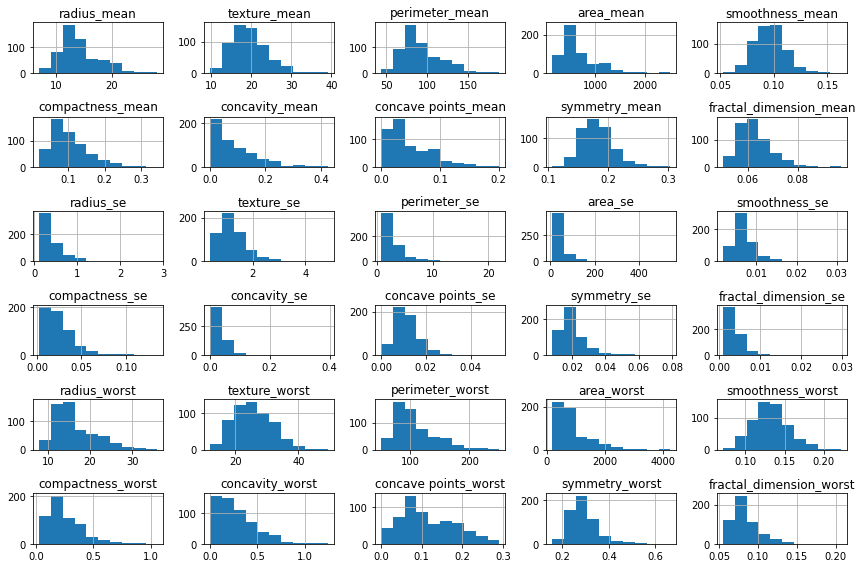

In [54]:
fig,ax=plt.subplots(figsize=(12,8))

dados.drop("id",axis=1).hist(ax=ax)

plt.tight_layout();

Para ver a força da correlação entre as variáveis, uma opção é plotar um heatmap. Repare no mapa abaixo como diversas variáveis possuem correlação positiva.

<AxesSubplot:>

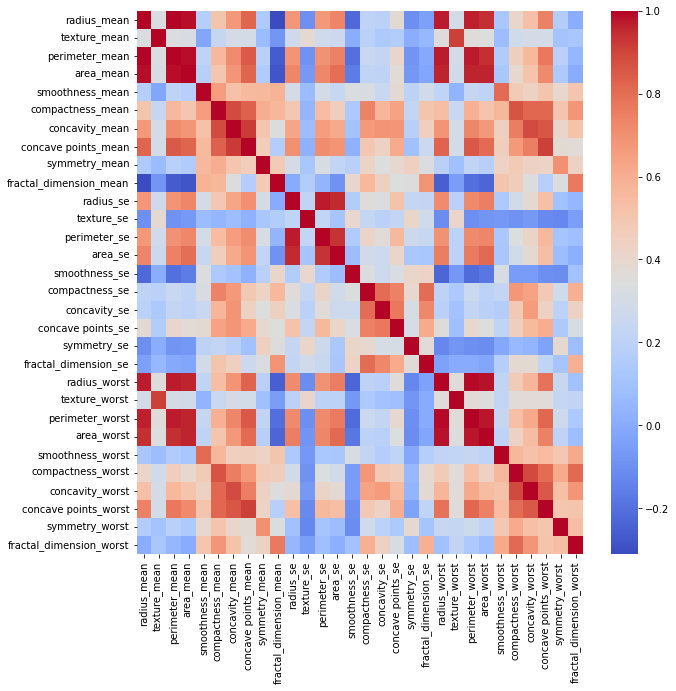

In [59]:
fig,ax=plt.subplots(figsize=(10,10))

sns.heatmap(dados.drop("id",axis=1).corr(),cmap="coolwarm",ax=ax)

## Preparação dos dados
Como parte do pré-processamento dos dados, que irão alimentar o modelo de Machine Learning, vou usar o StandardScaler, que vem junto com sklearn.preprocessing, para padronizar nossos dados numéricos.

Se você olhar no começo do código, vai reparar que a nossa variável alvo é categórica, onde M representa os tumores malignos e B os benignos. Usando LabelEncoder somos capazes de converter variáveis categóricas em numéricas e alimentar o modelo adequadamente.

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [75]:
X=dados.drop(["diagnosis","id"],axis=1)

In [76]:
Y=dados["diagnosis"]

In [77]:
X=StandardScaler().fit_transform(X)

In [81]:
Y=LabelEncoder().fit_transform(Y)


In [82]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

# Modelo de Machine Learning para detecção do câncer de mama
Este problema de detecção de câncer consiste em classificar corretamente um tumor entre benigno e maligno, ou seja, é necessário que o modelo de Machine Learning dê uma classificação ao ser alimentado com diversas variáveis independentes (features).

Aqui, usarei um modelo do tipo Random Forest (Floresta Aleatória) devido à sua flexibilidade e facilidade de uso (uma vez que funciona muito bem mesmo sem o ajuste nos hiperparâmetros).

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
modelo_RFC=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=42)

In [85]:
#Treinando o modelo

modelo_RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

O algoritmo Random Forest, que usa métodos ensemble, tem esse nome por que cria uma combinação de várias árvores de decisão - uma "floresta" realmente - verificando qual combinação apresenta melhor desempenho e acurácia.

Vamos dar uma checada no desempenho do modelo quando se depara pela primeira vez com o conjunto de testes.

## Desempenho do modelo de detecção de câncer de mama
Cada caso é um caso. Nem sempre uma excelente acurácia vai significar que seu modelo está bom.

Por exemplo, quando se trata de detectar câncer, queremos maximizar o número de verdadeiros positivos e minimizar o número de falsos negativos. No entanto, esta é uma balança difícil de equilibrar, e o trade-off pode ser bem subjetivo inclusive.

Aqui, além da métrica de acurácia vou usar a função classification_report para ver ver o desempenho do modelo sobre as métricas de precisão, recall, f1-score e support.

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [90]:
y_pred=modelo_RFC.predict(x_test)

In [91]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [93]:
ty_pred_proba=modelo_RFC.predict_proba(x_test)

In [95]:
accuracy_score(y_test,y_pred)

0.9707602339181286

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Aparentemente, o modelo está com ótimos valores nas métricas consideradas. Mas como eu disse lá em cima, cada caso é um caso.

Eu acho muito interessante você sempre dar uma checada na matriz de confusão. Para exemplificar, imagine que seu modelo é capaz de detectar com 99,999% de acurácia sempre que um paciente não apresenta um tumor maligno, mas apenas 85% de acurácia quando prevê que o mesmo paciente apresentar esse tumor maligno.

Há vezes em que é melhor ter mais falsos positivos e investigar mais profundamente o caso (como também é o caso de fraudes no cartão de crédito), e ter um modelo menos preciso

In [98]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,107,1
pos,4,59


# Conclusão



### Outubro Rosa e Machine Learning


Como você pode confirmar, o modelo classificatório Random Forest foi capaz de atingir uma acurácia superior a 96% e lidou muito bem com ambas as classes.

A importância de um dianóstico precoce do câncer de mama deve estar clara na cabeça de todo mundo.

Avanços e descobertas no campo da Inteligência Artificial ocorrem a todo momento, principalmente na área da saúde. Deteccção de Câncer por meio de algoritmos de Machine Learning ajudam cada vez mais os médicos a diagnosticarem seus pacientes, aumentando drásticamente as chances dos tratamentos concencionais.

No entanto, mesmo a construção de modelos altamente confiáveis para a detecção de câncer de mama não substitui uma variável, a principal feature, o diagnóstico precoce ;)